Importing Librarires to Scrape Data from Google play and for other operations

In [1]:
from google_play_scraper import Sort, reviews_all, reviews, app
import pandas as pd
import numpy as np

We are using Adobe Photoshop as our app for Analysis

In [3]:
result, continuation_token = reviews(
    'com.google.android.adobe',
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.NEWEST
    count=100, # defaults to 100
    filter_score_with=None # defaults to None(means all score)
)

result, _ = reviews(
    'com.adobe.psmobile',
    continuation_token=continuation_token # defaults to None(load from the beginning)
)

Scraped the result and putting it into a DataFrame

In [3]:
scrapeddata = pd.DataFrame(np.array(result), columns = ['review'])
scrapeddata = scrapeddata.join(pd.DataFrame(scrapeddata.pop('review').tolist()))

In [4]:
scrapeddata.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,1ace7fb7-82ce-42f3-a278-69d69fa5f551,Yassin Mounib,https://play-lh.googleusercontent.com/a-/ACNPE...,Nice,5,0,None,2022-09-23 15:07:31,None,NaT
1,b7aba515-acce-46d9-bddb-7f775660b792,Devih Wambua,https://play-lh.googleusercontent.com/a/ALm5wu...,Excellent photo editor,5,0,8.4.986,2022-09-23 14:13:51,None,NaT
2,26d6f60d-4193-417a-bd07-94d199b8ffeb,Bulli Chakraborty,https://play-lh.googleusercontent.com/a-/ACNPE...,Op #psop,5,0,None,2022-09-23 13:34:07,None,NaT
3,bc431ac2-5038-4ed0-a566-469272e1e16f,yasin arafat,https://play-lh.googleusercontent.com/a-/ACNPE...,Great app otp,5,0,8.4.986,2022-09-23 13:15:24,None,NaT
4,7237b882-9127-4046-98cb-1f6ca1954b69,Patrick Bart,https://play-lh.googleusercontent.com/a-/ACNPE...,"Six years after my first review, this still ge...",5,0,8.4.986,2022-09-23 13:01:00,None,NaT


In [5]:
scrapeddata['score'].mean()

4.226

In [6]:
scrapeddata['reviewCreatedVersion'].value_counts()

8.4.986    364
8.3.979      6
8.5.999      3
8.0.929      3
8.1.958      3
7.6.878      1
8.2.970      1
7.9.923      1
8.3.974      1
7.4.843      1
7.9.921      1
8.3.977      1
6.4.597      1
Name: reviewCreatedVersion, dtype: int64

In [7]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at siebert/sentiment-roberta-large-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [8]:
print(sentiment_analysis("bad"))

[{'label': 'NEGATIVE', 'score': 0.9990259408950806}]


In [9]:
scrapeddata.dtypes

reviewId                        object
userName                        object
userImage                       object
content                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
replyContent                    object
repliedAt               datetime64[ns]
dtype: object

In [10]:
scrapeddata['content'] = scrapeddata['content'].astype('str')

In [11]:
scrapeddata['result'] = scrapeddata['content'].apply(lambda x: sentiment_analysis(x))

In [12]:
scrapeddata.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,result
0,1ace7fb7-82ce-42f3-a278-69d69fa5f551,Yassin Mounib,https://play-lh.googleusercontent.com/a-/ACNPE...,Nice,5,0,None,2022-09-23 15:07:31,None,NaT,"[{'label': 'POSITIVE', 'score': 0.997769474983..."
1,b7aba515-acce-46d9-bddb-7f775660b792,Devih Wambua,https://play-lh.googleusercontent.com/a/ALm5wu...,Excellent photo editor,5,0,8.4.986,2022-09-23 14:13:51,None,NaT,"[{'label': 'POSITIVE', 'score': 0.998557031154..."
2,26d6f60d-4193-417a-bd07-94d199b8ffeb,Bulli Chakraborty,https://play-lh.googleusercontent.com/a-/ACNPE...,Op #psop,5,0,None,2022-09-23 13:34:07,None,NaT,"[{'label': 'POSITIVE', 'score': 0.939789295196..."
3,bc431ac2-5038-4ed0-a566-469272e1e16f,yasin arafat,https://play-lh.googleusercontent.com/a-/ACNPE...,Great app otp,5,0,8.4.986,2022-09-23 13:15:24,None,NaT,"[{'label': 'POSITIVE', 'score': 0.998521387577..."
4,7237b882-9127-4046-98cb-1f6ca1954b69,Patrick Bart,https://play-lh.googleusercontent.com/a-/ACNPE...,"Six years after my first review, this still ge...",5,0,8.4.986,2022-09-23 13:01:00,None,NaT,"[{'label': 'POSITIVE', 'score': 0.998797416687..."


In [13]:
scrapeddata.shape

(500, 11)

In [14]:
x = sentiment_analysis("I love this!")

In [15]:
x[0]['score']

0.9988656044006348

Making two more columns to distinguish the sentiment(Positive/Negative) and the score(i.e the percentage) 

In [16]:
scrapeddata['sentiment'] = scrapeddata['result'].apply(lambda x: (x[0]['label']))
scrapeddata['score'] = scrapeddata['result'].apply(lambda x: (x[0]['score']))


In [17]:
scrapeddata.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,result,sentiment
0,1ace7fb7-82ce-42f3-a278-69d69fa5f551,Yassin Mounib,https://play-lh.googleusercontent.com/a-/ACNPE...,Nice,0.997769,0,None,2022-09-23 15:07:31,None,NaT,"[{'label': 'POSITIVE', 'score': 0.997769474983...",POSITIVE
1,b7aba515-acce-46d9-bddb-7f775660b792,Devih Wambua,https://play-lh.googleusercontent.com/a/ALm5wu...,Excellent photo editor,0.998557,0,8.4.986,2022-09-23 14:13:51,None,NaT,"[{'label': 'POSITIVE', 'score': 0.998557031154...",POSITIVE
2,26d6f60d-4193-417a-bd07-94d199b8ffeb,Bulli Chakraborty,https://play-lh.googleusercontent.com/a-/ACNPE...,Op #psop,0.939789,0,None,2022-09-23 13:34:07,None,NaT,"[{'label': 'POSITIVE', 'score': 0.939789295196...",POSITIVE
3,bc431ac2-5038-4ed0-a566-469272e1e16f,yasin arafat,https://play-lh.googleusercontent.com/a-/ACNPE...,Great app otp,0.998521,0,8.4.986,2022-09-23 13:15:24,None,NaT,"[{'label': 'POSITIVE', 'score': 0.998521387577...",POSITIVE
4,7237b882-9127-4046-98cb-1f6ca1954b69,Patrick Bart,https://play-lh.googleusercontent.com/a-/ACNPE...,"Six years after my first review, this still ge...",0.998797,0,8.4.986,2022-09-23 13:01:00,None,NaT,"[{'label': 'POSITIVE', 'score': 0.998797416687...",POSITIVE


In [18]:
scrapeddata['sentiment'].value_counts(normalize=True)

POSITIVE    0.822
NEGATIVE    0.178
Name: sentiment, dtype: float64

In [19]:
scrapeddata['score'].mean()

0.993898353099823

Importing libraries to plot the diagram for better visulaization

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

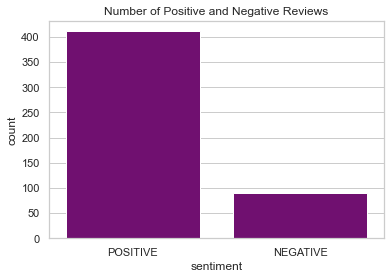

In [21]:
sns.set(style="whitegrid")
fig = sns.countplot(x=scrapeddata['sentiment'], color='purple')
plt.title('Number of Positive and Negative Reviews')
plt.show()

Final Result

In [22]:
scrapeddata['sentiment'].value_counts()

POSITIVE    411
NEGATIVE     89
Name: sentiment, dtype: int64

We can see from the above output the number of positive and negative reviews